In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def catimageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

Padding: Padding is to add extra pixels outside the image. And zero padding means every pixel value that you add is zero.

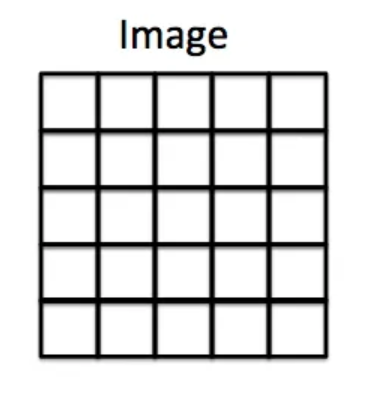
If zero padding = 1, there will be one pixel thick around the original image with pixel value = 0.

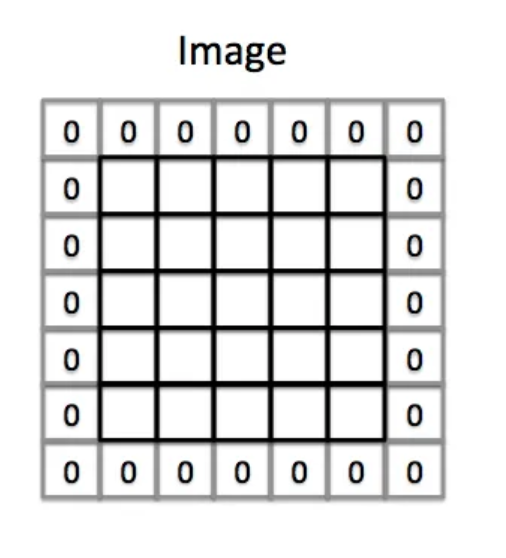

Every time we use the filter (a.k.a. kernel) to scan the image, the size of the image will go smaller and smaller. We don’t want that, because we wanna preserve the original size of the image to extract some low level features. Therefore, we will add some extra pixels outside the image!

cv2.copyMakeBorder() method ✈

cv2.copyMakeBorder() method is used to create a border around the image like a photo frame.

❤ Syntax: cv2.copyMakeBorder(src, top, bottom, left, right, borderType, value)

⚫Parameters: 🔽

🤪 src: It is the source image. 🤪 top: It is the border width in number of pixels in top direction. 🤪 bottom: It is the border width in number of pixels in bottom direction. 🤪 left: It is the border width in number of pixels in left direction. 🤪 right: It is the border width in number of pixels in right direction. 🤪 borderType: It depicts what kind of border to be added. It is defined by 🤪 flags like cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc dest: It is the destination image 🤪 value: It is an optional parameter which depicts color of border if border 🤪 type is cv2.BORDER_CONSTANT.

🤪 Return Value: It returns an image.

✈ The borderType flags are described below:

🤪 cv2.BORDER_REFLECT: The border will be mirror reflection of the border elements. Suppose, if image contains letters “abcdefg” then output will be “gfedcba|abcdefg|gfedcba“.

🤪 cv2.BORDER_CONSTANT: It adds a constant colored border. The value should be given as a keyword argument

🤪 cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT: It does the same works as cv2.BORDER_REFLECT but with slight change. Suppose, if image contains letters “abcdefgh” then output will be “gfedcb|abcdefgh|gfedcba“.

🤪 cv2.BORDER_REPLICATE: It replicates the last element. Suppose, if image contains letters “abcdefgh” then output will be “aaaaa|abcdefgh|hhhhh“.



In [3]:
def conv(image, kernel):
    imageH, imageW = image.shape[:2]
    kernelH, kernelW = kernel.shape[:2]
    
    padding = (kernelW-1) // 2
    
    image = cv2.copyMakeBorder(image, 
                              padding, padding,
                              padding, padding, 
                              cv2.BORDER_REFLECT)
    
    
    outputmask = np.zeros((imageH, imageW), dtype= "float32")
    
    
    for y in np.arange(padding, imageH+padding):
        for x in np.arange(padding, imageW+padding):
            # ROI --> Region if Interest
            roi = image[y - padding:y+padding+1, 
                       x - padding: x+padding+1]
            k = (roi*kernel).sum()
            outputmask[y-padding, x-padding] = k
            
            
    outputmask = rescale_intensity(outputmask, in_range = (0, 255))
    outputmask = (outputmask*255).astype("uint8")
    
    return outputmask

In [5]:
imageArgs = {"image":"../content/Final image.PNG"}

In [6]:
imageSamllBlur = np.ones((7, 7), dtype ="float")*(1.0/(7*7))
imageLargeBlur = np.ones((21, 21), dtype ="float")*(1.0/(21*21))

In [7]:
sharpen = np.array([[0, -1, 0], 
          [-1, 5, -1], 
          [0, -1, 0]], dtype = "int")

In [8]:
image  = cv2.imread(imageArgs["image"])
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
print("Image information {}".format(image.shape))
print("\nImage information {}".format(grayimage.shape))

Image information (367, 402, 3)

Image information (367, 402)


In [10]:
convImage = conv(image, sharpen)
filtersOnImage = cv2.filter2D(grayimage, -1, sharpen)

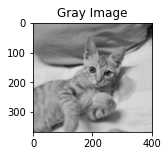

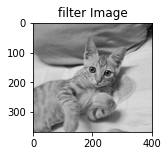

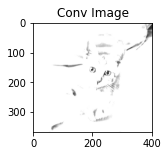

In [11]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", convImage)

In [12]:
emboss = np.array([[-2, 1, 0], 
          [-1, 1, 1], 
          [0, 1, 2]], dtype = "int")

In [13]:
emboosImage = conv(image, emboss)
filtersOnImage = cv2.filter2D(grayimage, -1, emboss)

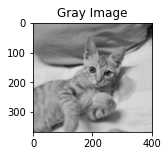

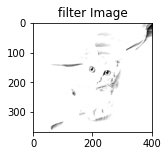

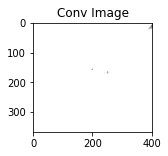

In [14]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", emboosImage)

In [15]:
right_sobel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype = "int")

In [16]:
right_sobelImage = conv(image, right_sobel)
filtersOnImage = cv2.filter2D(grayimage, -1, right_sobel)

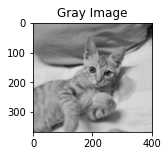

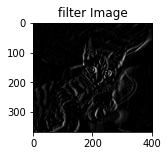

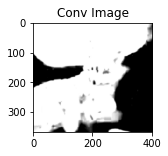

In [17]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", right_sobelImage)

In [18]:
left_sobel = np.array([[1, 0, -1],
                       [2, 0, 2],
                      [1, 0, -1]], dtype = "int")

In [19]:
left_sobelImage = conv(image, left_sobel)
filtersOnImage = cv2.filter2D(grayimage, -1, left_sobel)

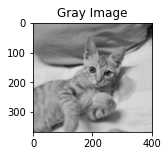

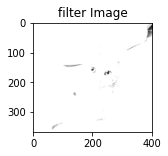

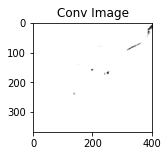

In [20]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", left_sobelImage)

In [21]:
bottom_sobel = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]], dtype = "int" )

In [22]:
bottom_sobelImage = conv(image, bottom_sobel)
filtersOnImage = cv2.filter2D(grayimage, -1, bottom_sobel)

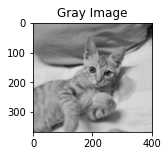

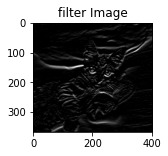

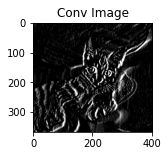

In [23]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", bottom_sobelImage)

In [24]:
top_sobel = np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]], dtype = "int")

In [25]:
top_sobelImage = conv(image, top_sobel)
filtersOnImage = cv2.filter2D(grayimage, -1, top_sobel)

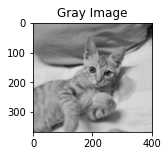

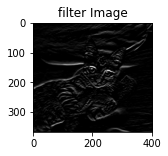

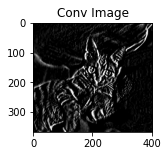

In [26]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", top_sobelImage)

In [27]:
identity = np.array([[0, 0 ,0],
                  [0, 1, 0],
                  [0, 0, 0]], dtype = "int")

In [28]:
identityImage = conv(image, identity)
filtersOnImage = cv2.filter2D(grayimage, -1, identity)

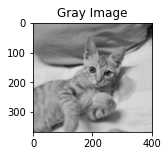

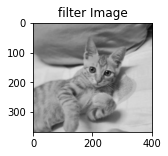

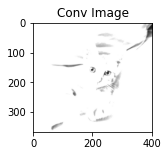

In [29]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", identityImage)

In [30]:
outline = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]], dtype = "int")

In [31]:
outlineImage = conv(image, outline)
filtersOnImage = cv2.filter2D(grayimage, -1, outline)

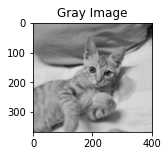

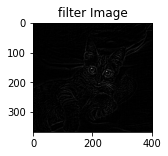

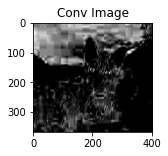

In [32]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", outlineImage)

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2.putText() method is used to draw a text string on any image.


Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

Parameters:
image: It is the image on which text is to be drawn.

text: Text string to be drawn.

org: It is the coordinates of the bottom-left corner of the text string in the image. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).

font: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.

fontScale: Font scale factor that is multiplied by the font-specific base size.

color: It is the color of text string to be drawn. For BGR, we pass a tuple.
 eg: (255, 0, 0) for blue color.

thickness: It is the thickness of the line in px.
lineType: This is an optional parameter.It gives the type of the line to be used.

bottomLeftOrigin: This is an optional parameter. When it is true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

Return Value: It returns an image.



# Python program to explain cv2.putText() method
    
# importing cv2
import cv2

    
# path
path = r'C:\Users\Rajnish\Desktop\geeksforgeeks\geeks.png'

    
# Reading an image in default mode
image = cv2.imread(path)

    
# Window name in which image is displayed
window_name = 'Image'

  
# font
font = cv2.FONT_HERSHEY_SIMPLEX

  
# org
org = (50, 50)

  
# fontScale

fontScale = 1

   
# Blue color in BGR
color = (255, 0, 0)

  
# Line thickness of 2 px
thickness = 2

   
# Using cv2.putText() method
image = cv2.putText(image, 'OpenCV', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
                   
   
# Displaying the image
cv2.imshow(window_name, image) 

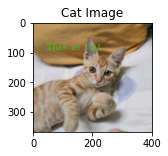

Text(0.5, 1.0, 'Image of Cat')

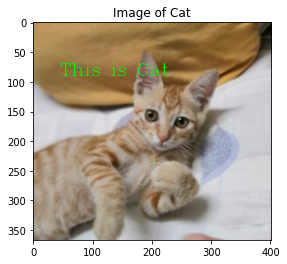

In [33]:
imageText = image.copy()
textonimage = "This is Cat"
imageCoor = (45, 90)
cv2.putText(imageText, textonimage, imageCoor, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
           fontScale= 1.0,
           color = (0, 255, 0))
catimageShow("Cat Image", imageText)
#cv2.waitKey(0)
#cv2.destroyWindow("Cat Image")

image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Cat")

Text(0.5, 1.0, 'Image of Cat')

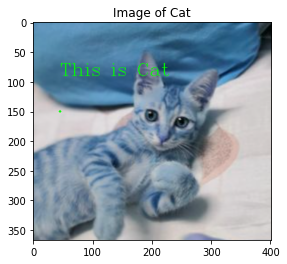

In [34]:
imageText = image.copy()
imageCoor1 = (45, 150)
imageCoor2 = (60, 190)
cv2.rectangle(imageText, imageCoor1, imageCoor1,thickness = 3, color = (0, 255, 0))
image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Cat")

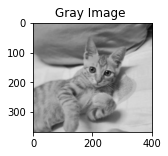

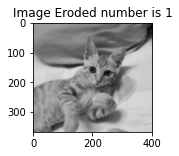

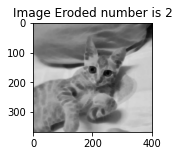

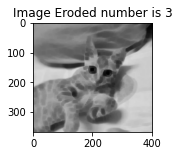

In [35]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
catimageShow("Gray Image ",imageGray)
for i in range(0, 3):
    imageEroded = cv2.erode(imageGray, None, iterations = i+1)
    catimageShow("Image Eroded number is {}".format(i+1), imageEroded)

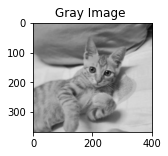

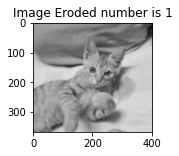

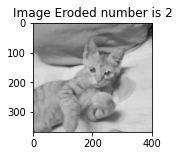

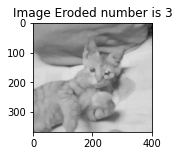

In [36]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
catimageShow("Gray Image ",imageGray)
for i in range(0, 3):
    imageDilated= cv2.dilate(imageGray, None, iterations = i+1)
    catimageShow("Image Eroded number is {}".format(i+1), imageDilated)

Syntax: cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
Parameters:

src: It is the image which is to be eroded .

kernel: A structuring element used for erosion. If element = Mat(), a 3 x 3 rectangular structuring element is used. Kernel can be created using getStructuringElement.

dst: It is the output image of the same size and type as src.

anchor: It is a variable of type integer representing anchor point and it’s default value Point is (-1, -1) which means that the anchor is at the kernel center.

borderType: It depicts what kind of border to be added. It is defined by flags like cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, etc.

iterations: It is number of times erosion is applied.

borderValue: It is border value in case of a constant border.

Return Value: It returns an image.

# Python program to explain cv2.erode() method 

  
# importing cv2 
import cv2

  
# importing numpy 
import numpy as np

  
# path 
path = r'C:\Users\Rajnish\Desktop\geeksforgeeks\geeks.png'


  
# Reading an image in default mode 
image = cv2.imread(path) 


  
# Window name in which image is displayed 
window_name = 'Image'

  
# Creating kernel
kernel = np.ones((5, 5), np.uint8)

  
# Using cv2.erode() method 
image = cv2.erode(image, kernel) 

  
# Displaying the image 
cv2.imshow(window_name, image) 

Morphological Transformations
Goal

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play.
We will work by this below image:

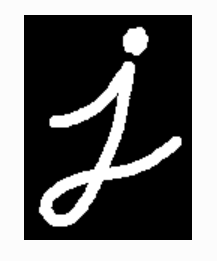

1. Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).


So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

import cv2
import numpy as np

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

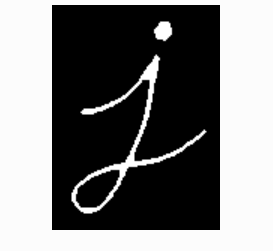

2. Dilation


It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

code:


dilation = cv2.dilate(img,kernel,iterations = 1)

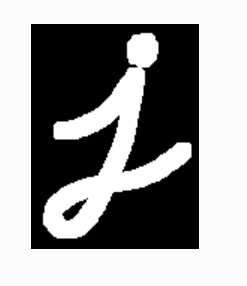

3. Opening


Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

Code:

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

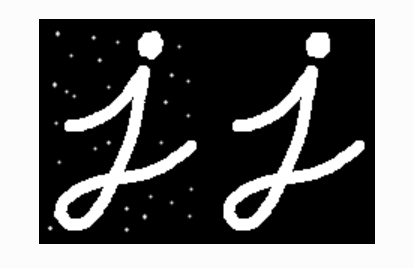

4. Closing


Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

Code:


closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

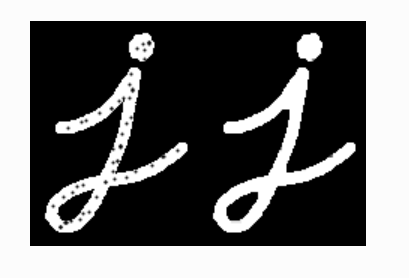

5. Morphological Gradient

It is the difference between dilation and erosion of an image.


The result will look like the outline of the object.


gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
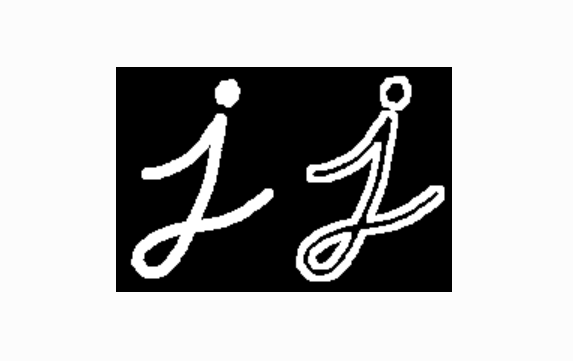

6. Top Hat


It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

Code:



tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

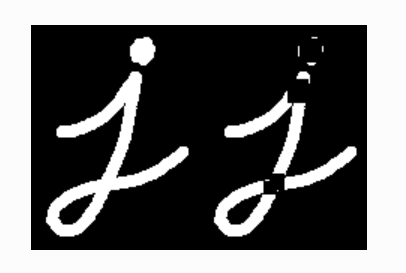

7. Black Hat


It is the difference between the closing of the input image and input image.

Code:



blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

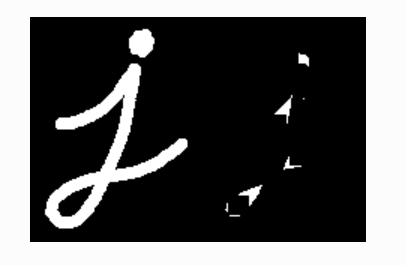

Structuring Element


We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.


# Rectangular Kernel
>>> cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)


# Elliptical Kernel
>>> cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)
       

# Cross-shaped Kernel
>>> cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

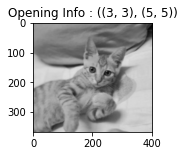

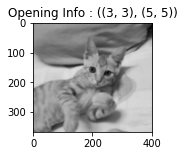

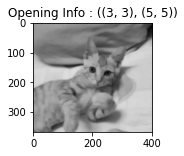

In [37]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]

#catimageShow("Gray Image ",imageGray)
for i in kernelSize:
    k= cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_OPEN, k)
    catimageShow("Opening Info : ({}, {})".format(kernelSize[0], kernelSize[1]), mo)
    
#     imageEroded = cv2.erode(imageGray, None, iterations = i+1)
#     catimageShow("Image Eroded number is {}".format(i+1), imageEroded)

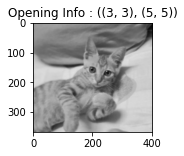

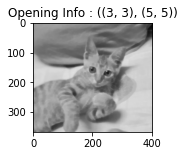

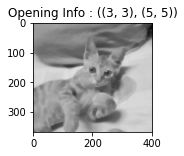

In [38]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]

#catimageShow("Gray Image ",imageGray)
for i in kernelSize:
    k= cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_CLOSE, k)
    catimageShow("Opening Info : ({}, {})".format(kernelSize[0], kernelSize[1]), mo)
    
#     imageEroded = cv2.erode(imageGray, None, iterations = i+1)
#     catimageShow("Image Eroded number is {}".format(i+1), imageEroded)


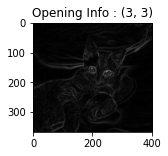

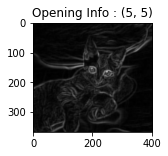

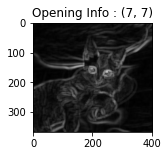

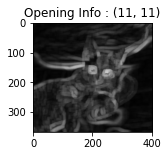

In [39]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7), 
             (11, 11)]

#catimageShow("Gray Image ",imageGray)
for i in kernelSize:
    #print(i)
    k= cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_GRADIENT, k)
    catimageShow("Opening Info : {}".format(i), mo)
    
#     imageEroded = cv2.erode(imageGray, None, iterations = i+1)
#     catimageShow("Image Eroded number is {}".format(i+1), imageEroded)


In [40]:
# import cv2
# import mediapipe as mp

# webcam = cv2.VideoCapture(0)
# # mp_face = mp.solutions.face_mesh
# # mp_drawing = mp.solutions.drawing_utils
# hand = mp.solutions.hands
# handsDrw = mp.solutions.drawing_utils

# with hand.Hands(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as hands:
#     while True:
#         control, frame = webcam.read()
#         # if control == False:
#         #     break
#         rgb =cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         result = hands.process(rgb)

#         if result.multi_hand_landmarks:
#             for hand_landmarks in result.multi_hand_landmarks:
#                 handsDrw.draw_landmarks(frame, hand_landmarks, hand.HAND_CONNECTIONS)
#         cv2.imshow("Test2", frame)

#         if cv2.waitKey(10) == 27:
#             break